# Notebook I - Climate Regime

In [ ]:
# import psutil
# # psutil.virtual_memory()
# psutil.virtual_memory().free/1E9

Now, we will import the specific Python packages we need for PyAEZ.

In [1]:
'''import supporting libraries'''
import numpy as np
import matplotlib.pyplot as plt
# import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal    
import sys
from time import time as timer
import xarray as xr
import rioxarray as rio

gdal.UseExceptions()


# import psutil
# from dask.distributed import Client,LocalCluster
# import graphviz

In [21]:
# branch version tag
revname='v21pv'

# # HPC Orion
# # Replace with path to your PyAEZ folder under your username
# work_dir = '/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/pyaez2.1_vectorize/'
# # Replace with whatever location you want to output data under your username
# out_path = '/work/hpc/users/kerrie/UN_FAO/pyaez_results/china_8110/'+revname+'/' 
# # these are the same for everyone on HPC Orion
# data_dir = '/work/hpc/datasets/un_fao/pyaez/china_8110/daily/npy/'
# maskfile = '/work/hpc/datasets/un_fao/pyaez/china_static/netcdf/mask.nc'
# elevfile = '/work/hpc/datasets/un_fao/pyaez/china_static/tif/elev.tif'


# # Kerrie desktop
dir_toplev=r'C://Users/kerrie.WIN/Documents/data/'
work_dir = r'K:/projects/unfao/pyaez_gaez/repos/PyAEZ_kerrie/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
out_path = work_dir+'NB1outputs/' # path for saving output data

# china
# data_dir = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/npy/' # path to your data
# maskfile = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/tif/mask.tif'# subset for no antarctica, 1800 lats
# elevfile = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/tif/elev.tif'
# soilfile = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/tif/soil_terrain_lulc_china_08333.tif'

# global
data_dir = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/npy/' # path to your data
maskfile = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/tif/mask_2268708_5m.tif'# subset for no antarctica, 1800 lats
elevfile = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/tif/Elevation_2268708_5m.tif'
soilfile = r'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/tif/soil_terrain_lulc_global_08333_clipped.tif'


# # Kerrie laptop china
# work_dir = 'C://Users/kerrie/Documents/01_LocalCode/repos/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# dir_toplev='C://Users/kerrie/Documents/01_LocalCode/'
# data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/npy/' # path to your data
# maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/tif/mask.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/tif/elev.tif'
# data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/15GB/' # path to your data
# maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/15GB/mask.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/15GB/elev.tif'

# # Kerrie laptop global
# work_dir = 'C://Users/kerrie/Documents/01_LocalCode/repos/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/npy/' # path to your data
# maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/tif/mask_2268708_5m.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/tif/Elevation_2268708_5m.tif'

# Check whether the specified path exists or not
isExist = os.path.exists(out_path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(out_path)
   print("The new directory is created!")

daskpath=os.path.join(dir_toplev, "dask-worker-space-can-be-deleted")

isExist = os.path.exists(daskpath)
if not isExist:
   os.mkdir(daskpath)
   print("dask worker directory created")

In [3]:
# %load_ext autoreload
# %autoreload 2
# Import Module 1 and initate Class intance
# from pyaez import ClimateRegime
# clim_reg = ClimateRegime.ClimateRegime()

# # Importing UtilitiesCalc
# from pyaez import UtilitiesCalc
# obj_util = UtilitiesCalc.UtilitiesCalc()
sys.path.append(work_dir)
# import ClimateRegime_v21pv as ClimateRegime
# import ClimateRegime_test as ClimateRegime
import ClimateRegime_loopchunks as ClimateRegime
clim_reg = ClimateRegime.ClimateRegime()

# import UtilitiesCalc_v21pv as UtilitiesCalc
import UtilitiesCalc_test as UtilitiesCalc
obj_utilities=UtilitiesCalc.UtilitiesCalc()


# import UtilitiesCalc_v21pv as UtilitiesCalc
import LGPCalc_loopchunks as LGPCalc


In [22]:
# expect 2 seconds run time for china
# expect s run time for global

# DATA INFORMATION
daily = True         # Type of climate data. True: daily, False: monthly
parallel=True#False#True# # flag for dask parallel processing (for speed). True: use dask. False: no dask, only numpy
mask_value = 0       # pixel value in admin_mask to exclude from the analysis

if parallel:
    import dask.array as da
    import dask

start=timer()

# If parallel=True, load the inputs as lazy dask arrays, data type float32 
max_temp = da.from_npy_stack(data_dir+'Tmax-2m365/').astype('float32')  # maximum temperature
min_temp = da.from_npy_stack(data_dir+'Tmin-2m365/').astype('float32')  # minimum temperature
precipitation = da.from_npy_stack(data_dir+'Precip365/').astype('float32')  # precipitation
rel_humidity = da.from_npy_stack(data_dir+'Rhum365/').astype('float32')  # relative humidity
wind_speed = da.from_npy_stack(data_dir+'Wind-2m365/').astype('float32') # wind speed measured at two meters
short_rad = da.from_npy_stack(data_dir+'Srad365/').astype('float32')  # shortwave radiation
mask=da.from_array(gdal.Open(maskfile).ReadAsArray())
elevation=da.from_array(gdal.Open(elevfile).ReadAsArray())
soil_terrain_lulc=da.from_array(gdal.Open(soilfile).ReadAsArray())

# # If parallel=False, load the inputs as numpy arrays, data type float32 
# max_temp = np.load(data_dir+'Tmax-2m365/0.npy').astype('float32')  # maximum temperature
# min_temp = np.load(data_dir+'Tmin-2m365/0.npy').astype('float32')  # minimum temperature
# precipitation = np.load(data_dir+'Precip365/0.npy').astype('float32')  # precipitation
# rel_humidity = np.load(data_dir+'Rhum365/0.npy').astype('float32')  # relative humidity
# wind_speed = np.load(data_dir+'Wind-2m365/0.npy').astype('float32') # wind speed measured at two meters
# short_rad = np.load(data_dir+'Srad365/0.npy').astype('float32')  # shortwave radiation
# mask=gdal.Open(maskfile).ReadAsArray()
# elevation=gdal.Open(elevfile).ReadAsArray()
# soil_terrain_lulc=gdal.Open(soilfile).ReadAsArray()

print(min_temp.shape,mask.shape,soil_terrain_lulc.shape)
print(round((max_temp.nbytes+min_temp.nbytes+precipitation.nbytes+rel_humidity.nbytes+wind_speed.nbytes+short_rad.nbytes+mask.nbytes+elevation.nbytes+soil_terrain_lulc.nbytes)/1E9,2),'GB total input data')

task_time=timer()-start
task_time

(1800, 4320, 365) (1800, 4320) (1800, 4320)
68.19 GB total input data


0.16187095642089844

In [5]:
# Define the Area-Of-Interest's geographical extents

# if lat_min/lat_max values defined below are located at pixel center --> set lat_centers to True 
# if they are located at the exterior pixel edge --> set lat_centers to False
lat_centers=True 

# provide min and max latitudes (either set manually or read from a data file)
# lat_min = 18.04167
# lat_max = 53.625
lats=rio.open_rasterio(maskfile)['y'].data   # get array of latitudes from maskfile
lat_min = np.trunc(lats.min()*100000)/100000 # min lat value at pixel center, limit precision to 5 decimal places
lat_max = np.trunc(lats.max()*100000)/100000 # max lat value at pixel center, limit precision 5 decimal places



### Loading the imported data into the Object Class ('*clim_reg*' Class)

In [6]:
# expect >1s run time for china

# For parallel=True, this sets the chunk size based on the amount of available RAM and CPU threads
# There are 2 possible user overrides: 
# 1) instead of accepting the default chunk size, the user can enter the total number of 
# chunks desired in order to increase or decrease the chunk size. Although, choosing very 
# large chunks may cause the notebook to fail due to lack of available memory.
# 2) The user can indicate they want to use less RAM for the computation with reduce_mem_used=True, 
# which sets a smaller chunk size that allows the computations to proceed using less than x GB RAM

# For parallel=False, this sets all parameters associated with chunking to None

start=timer()

clim_reg.setParallel(max_temp,parallel)#,nchunks=288,reduce_mem_used=True)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print(clim_reg.nchunks, clim_reg.chunk3D, clim_reg.chunksize3D_MB)
print('time:',task_time)

dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks'])
155 (-1, 28, -1) 73.584
time: 0.002992391586303711


In [7]:
# expect >1s run time for china

# For parallel=True, this chunks clim_reg.im_mask

start=timer()

clim_reg.setStudyAreaMask(mask, mask_value)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)

dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks', 'im_mask', 'nodata_val', 'set_mask'])
time: 0.002992391586303711


In [8]:
# expect >1s run time for china

# Added functionality includes identifying whether the lat_min lat_max given
# are located at pixel centers or exterior edges. The function now takes this 
# into account when generating a 2D latitude map.

# For parallel=True, this chunks clim_reg.latitude and clim_reg.elevation

start=timer()

clim_reg.setLocationTerrainData(lat_min, lat_max, lat_centers, elevation) #KLG

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)


dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks', 'im_mask', 'nodata_val', 'set_mask', 'elevation', 'im_height', 'im_width', 'latitude'])
time: 0.003990888595581055


In [9]:
# parallel=True; for global expect ~8.5min (laptop), ~11.5min (desktop) run time
# parallel=True; for china expect x (laptop), ~24s (desktop) run time
# parallel=False; for china

# For parallel=True, this chunks all input variables and attaches to clim_reg as lazy dask arrays which aren't held in RAM
# It computes the following as numpy arrays saved in RAM: pet_daily, meanT_monthly_sealevel, P_by_PET_monthly, 
# meanT_monthly, totalPrec_monthly, annual_Tmean, annual_accPrec, annual_accPET
# Everything else remains a dask array to be loaded and computed later when needed.

start=timer()

clim_reg.setDailyClimateData(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

task_time=timer()-start
print(clim_reg.__dict__.keys())
print('time:',task_time)

c:\Users\kerrie.WIN\.conda\envs\pyaez_dask\Lib\site-packages\dask\core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\kerrie.WIN\.conda\envs\pyaez_dask\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\kerrie.WIN\.conda\envs\pyaez_dask\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks', 'im_mask', 'nodata_val', 'set_mask', 'elevation', 'im_height', 'im_width', 'latitude', 'doy_start', 'doy_end', 'set_monthly', 'pet_daily', 'meanT_daily', 'meanT_monthly_sealevel', 'P_by_PET_monthly', 'maxT_daily', 'totalPrec_daily', 'meanT_monthly', 'totalPrec_monthly', 'annual_Tmean', 'annual_accPrec', 'annual_accPET'])
time: 569.5007371902466


5.043616533279419


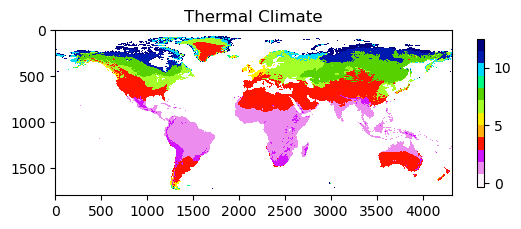

In [10]:
start=timer()

tclimate = clim_reg.getThermalClimate()

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(tclimate, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Climate')
plt.colorbar(shrink=0.4)
plt.show()

3.9517476558685303


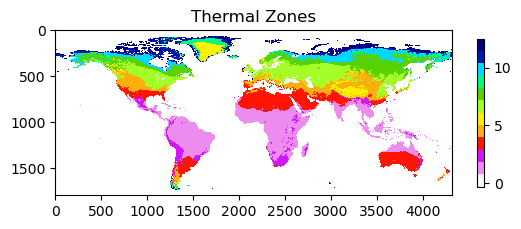

In [11]:
start=timer()

tzone = clim_reg.getThermalZone()

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(tzone, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Zones')
plt.colorbar(shrink=0.4)
plt.show()

99.3974404335022


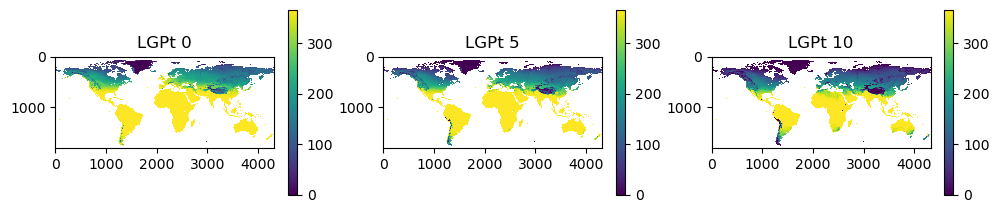

In [12]:
start=timer()

lgpt0 = clim_reg.getThermalLGP0()
lgpt5 = clim_reg.getThermalLGP5()
lgpt10 = clim_reg.getThermalLGP10()

task_time=timer()-start
print(task_time)

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.imshow(lgpt0,vmin=0,vmax=366,interpolation='none')
plt.title('LGPt 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(lgpt5, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(lgpt10, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.show()

116.97139167785645


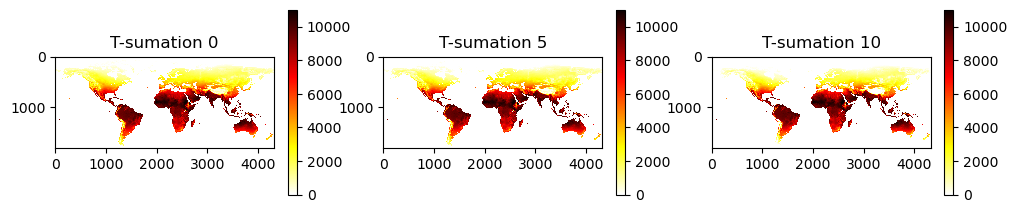

In [13]:
start=timer()

tsum0 = clim_reg.getTemperatureSum0()
tsum5 = clim_reg.getTemperatureSum5()
tsum10 = clim_reg.getTemperatureSum10()

task_time=timer()-start
print(task_time)

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.imshow(tsum0, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(tsum5, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(tsum10, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.show()

loop 0 of 39 , this message will print every 10 chunks
loop 10 of 39 , this message will print every 10 chunks
loop 20 of 39 , this message will print every 10 chunks
loop 30 of 39 , this message will print every 10 chunks


k:\projects\unfao\pyaez_gaez\repos\PyAEZ_kerrie\PyAEZ\pyaez2.1_parvec\ClimateRegime_loopchunks.py:874: RuntimeWarning: divide by zero encountered in divide
  moisture_index = self.annual_accPrec/self.annual_accPET
k:\projects\unfao\pyaez_gaez\repos\PyAEZ_kerrie\PyAEZ\pyaez2.1_parvec\ClimateRegime_loopchunks.py:876: RuntimeWarning: invalid value encountered in subtract
  lgp_equv = 14.0 + 293.66*moisture_index - 61.25*moisture_index*moisture_index


1375.04984664917


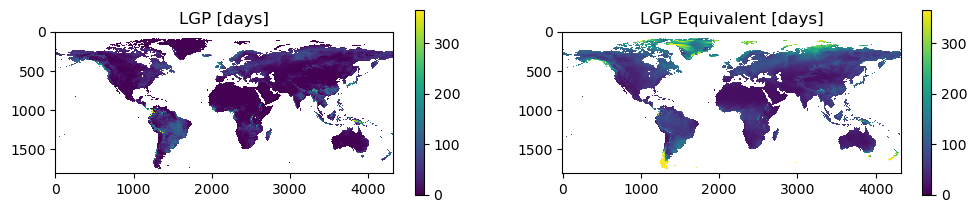

In [14]:
start=timer()

lgp = clim_reg.getLGP(Sa=100., D=1.)
lgp_class = clim_reg.getLGPClassified(lgp)
lgp_equv = clim_reg.getLGPEquivalent()

task_time=timer()-start
print(task_time)

fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(lgp, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP [days]')
plt.colorbar(shrink=0.8)
plt.subplot(122)
plt.imshow(lgp_equv, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP Equivalent [days]')
plt.colorbar(shrink=0.8)
plt.show()

237.61699795722961


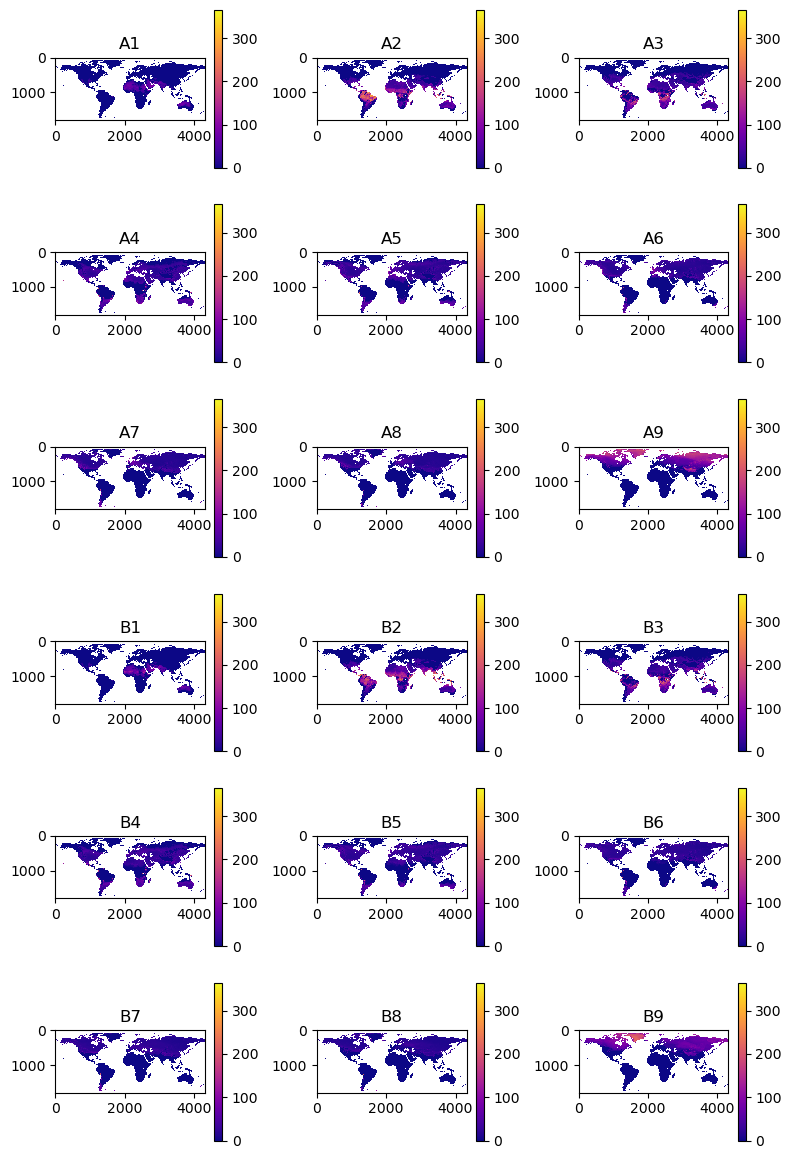

In [15]:
start=timer()

tprofile = clim_reg.getTemperatureProfile()

task_time=timer()-start
print(task_time)

tile_list = ['A1','A2','A3','A4','A5','A6','A7','A8','A9',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

fig = plt.figure(figsize=(8, 12))
for i1 in range(1, 19):
    plt.subplot(6, 3, i1)
    plt.imshow(tprofile[i1-1],interpolation='none',vmin=0,vmax=365,cmap='plasma')
    plt.title(tile_list[i1-1])
    plt.colorbar(shrink=0.8)
plt.tight_layout()
plt.show()

23.177270889282227


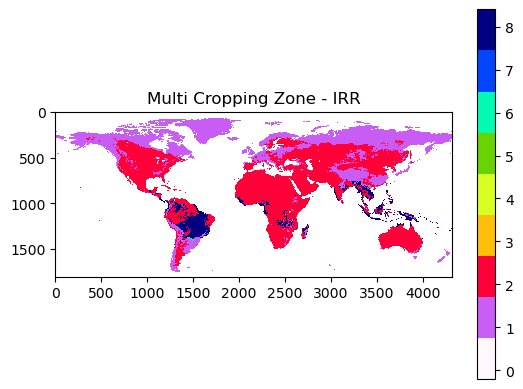

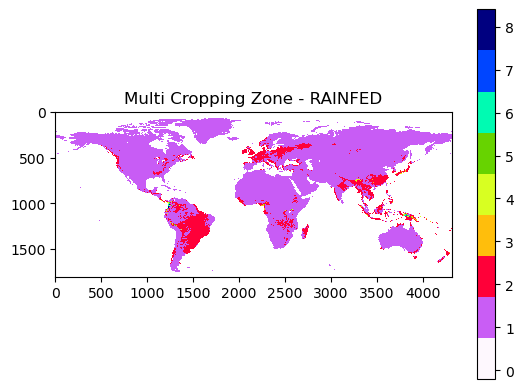

In [16]:
start=timer()

multi_crop = clim_reg.getMultiCroppingZones(tclimate, lgp, lgpt5, lgpt10, tsum0, tsum10)
multi_crop_rainfed = multi_crop[0]  # for rainfed conditions
multi_crop_irr = multi_crop[1]  # for irrigated conditions

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(multi_crop_irr, cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - IRR')
plt.colorbar()
plt.show()

fig = plt.figure()
plt.imshow(multi_crop_rainfed,cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - RAINFED')
plt.colorbar()
plt.show()

85.78571557998657


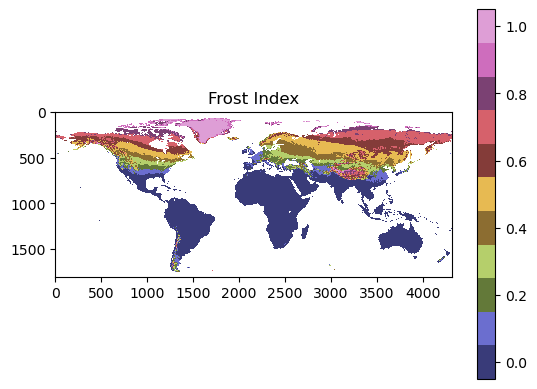

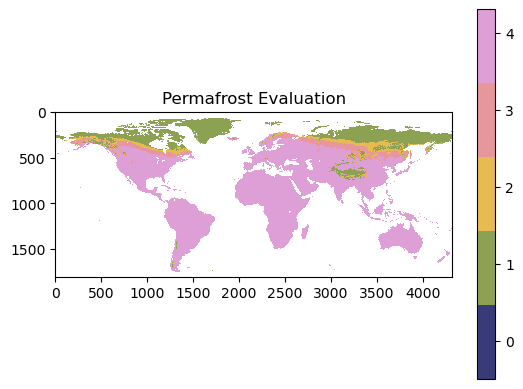

In [17]:
start=timer()

permafrost_eval = clim_reg.AirFrostIndexandPermafrostEvaluation()
frost_index = permafrost_eval[0]
permafrost = permafrost_eval[1]

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(frost_index, cmap=plt.get_cmap('tab20b', 11), vmin=-0.05, vmax=1.05,interpolation='none')
plt.title('Frost Index')
plt.colorbar()
plt.show()

fig = plt.figure()
plt.imshow(permafrost, cmap=plt.get_cmap('tab20b', 5), vmin=-0.5, vmax=4.3,interpolation='none')
plt.title('Permafrost Evaluation')
plt.colorbar()
plt.show()

1.9558749198913574


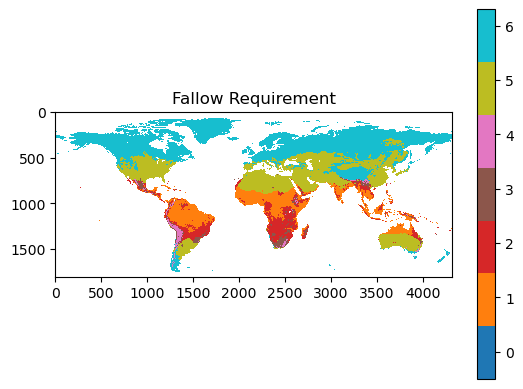

In [18]:
start=timer()

tzone_fallow = clim_reg.TZoneFallowRequirement(tzone)

task_time=timer()-start
print(task_time)

fig = plt.figure()
plt.imshow(tzone_fallow, cmap=plt.get_cmap('tab10', 7), vmin=-0.5, vmax=6.3,interpolation='none')
plt.title('Fallow Requirement')
plt.colorbar()
plt.show()

In [19]:
# check dtypes of all outputs
outputs=[tclimate,tzone,lgpt0,lgpt5,lgpt10,tsum0,tsum5,tsum10,tprofile,lgp,lgp_class,lgp_equv,multi_crop_rainfed,multi_crop_irr,frost_index,permafrost,tzone_fallow]
dtypes=[]
for var in outputs:
    # for arrays
    try:
        dt=var.dtype
        dtypes.append(dt)
    # for lists of arrays
    except:
        for v in var:
            dt=v.dtype
            dtypes.append(dt)

print(dtypes)

[dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32')]


### Agro-ecological zones classification
The agro-ecological zones (AEZ) methodology provides a framework for establishing a spatial inventory of land resources compiled from global/national environmental data sets and assembled to quantify multiple spatial characteristics required for the assessments of land productivity under location-specific agro-ecological conditions.

In [23]:
# can't run until we have the global soil_terrain_lulc

# expect ~ minutes run time for global
start=timer()

aez = clim_reg.AEZClassification(tclimate, lgp, lgp_equv, lgpt5, soil_terrain_lulc, permafrost)

task_time=timer()-start
task_time

69.76035046577454

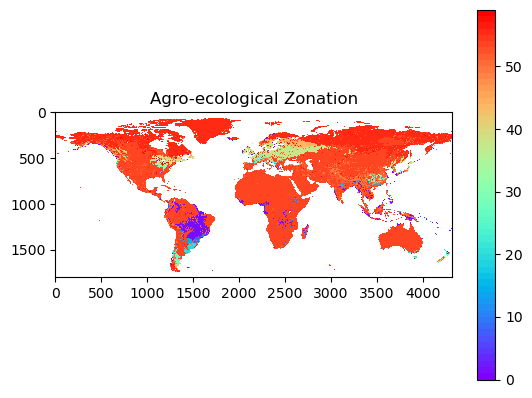

In [24]:
# now visualizing result
fig = plt.figure()
plt.imshow(aez, cmap=plt.get_cmap('rainbow', 59), vmin=0, vmax=59,interpolation='none')
plt.title('Agro-ecological Zonation')
plt.colorbar()
plt.savefig(out_path+"aez_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

In [ ]:
np.unique(aez)

In [ ]:
nmo_ge_10=np.sum(clim_reg.meanT_monthly>=10,axis=2)
nmo_lt_10=np.sum(clim_reg.meanT_monthly<10,axis=2)
nmo_ge_5=np.sum(clim_reg.meanT_monthly>=5,axis=2)
temp_acc_10deg = np.where(clim_reg.meanT_daily<10,0,clim_reg.meanT_daily).sum(axis=2).compute()
# temp_acc_10deg = np.nansum(np.where(clim_reg.meanT_daily<10,0,clim_reg.meanT_daily),axis=2).compute()
# temp_acc_10deg
aez_tzone = np.zeros((clim_reg.im_height, clim_reg.im_width), dtype='int8')
aez_tzone=np.where((nmo_ge_10==any([1,2,3]))&(clim_reg.annual_Tmean<0)&(aez_tzone==0),5,aez_tzone)
aez_tzone

In [ ]:
aez_tzone = np.zeros((clim_reg.im_height, clim_reg.im_width), dtype='int8')
aez_tzone=np.where((nmo_ge_10>=1)&(nmo_ge_10<=3)&(clim_reg.annual_Tmean<0)&(aez_tzone==0),5,aez_tzone)
aez_tzone

In [ ]:
for i in range(1, 4):
    print(i)

In [ ]:
def AEZClassification(self, tclimate, lgp, lgp_equv, lgpt_5, soil_terrain_lulc, permafrost):

    #1st step: reclassifying the existing 12 classes of thermal climate into 6 major thermal climate.
    # Class 1: Tropics, lowland
    # Class 2: Tropics, highland
    # Class 3: Subtropics
    # Class 4: Temperate Climate
    # Class 5: Boreal Climate
    # Class 6: Arctic Climate
    aez_tclimate = np.zeros((self.im_height, self.im_width), dtype='int8')
    # tropics highland
    aez_tclimate=np.where((tclimate==1),1,aez_tclimate)
    aez_tclimate=np.where((tclimate==2),2,aez_tclimate)
    aez_tclimate=np.where((tclimate==3),3,aez_tclimate)
    aez_tclimate=np.where((tclimate==4),3,aez_tclimate)
    aez_tclimate=np.where((tclimate==5),3,aez_tclimate)
    # grouping all the temperate classes into a single class 4    
    aez_tclimate=np.where((tclimate==6),4,aez_tclimate)
    aez_tclimate=np.where((tclimate==7),4,aez_tclimate)
    aez_tclimate=np.where((tclimate==8),4,aez_tclimate)
    # grouping all the boreal classes into a single class 5
    aez_tclimate=np.where((tclimate==9),5,aez_tclimate)
    aez_tclimate=np.where((tclimate==10),5,aez_tclimate)
    aez_tclimate=np.where((tclimate==11),5,aez_tclimate)
    # changing the arctic class into class 6
    aez_tclimate=np.where((tclimate==12),6,aez_tclimate)


    # 2nd Step: Classification of Thermal Zones
    aez_tzone = np.zeros((self.im_height, self.im_width), dtype='int8')
    # things we need for the conditional statements
    nmo_ge_10=np.sum(self.meanT_monthly>=10,axis=2)
    nmo_lt_10=np.sum(self.meanT_monthly<10,axis=2)
    nmo_ge_5=np.sum(self.meanT_monthly>=5,axis=2)
    temp_acc_10deg = np.where(self.meanT_daily<10,0,self.meanT_daily).sum(axis=2)
    nday_gt_20=np.sum(self.meanT_daily>20,axis=2)
    if self.parallel:
        temp_acc_10deg=temp_acc_10deg.compute()
        nday_gt_20=nday_gt_20.compute()

    # Warm Tzone (TZ1)
    aez_tzone=np.where((nmo_ge_10==12)&(self.annual_Tmean>=20),1,aez_tzone)
    # Moderately cool Tzone (TZ2)
    aez_tzone=np.where((nmo_ge_5==12)&(nmo_ge_10>=8)&(aez_tzone==0),2,aez_tzone)
    # TZ3 Moderate
    aez_tzone=np.where((aez_tclimate==4)&(nmo_ge_10>=5)&(nday_gt_20>=75)&(temp_acc_10deg>3000)&(aez_tzone==0),3,aez_tzone)
    # TZ4 Cool
    aez_tzone=np.where((nmo_ge_10>=4)&(self.annual_Tmean>=0)&(aez_tzone==0),4,aez_tzone)
    # TZ5 Cold
    aez_tzone=np.where((nmo_ge_10>=1)&(nmo_ge_10<=3)&(self.annual_Tmean>=0)&(aez_tzone==0),5,aez_tzone)
    # TZ6 Very cold
    aez_tzone=np.where((nmo_lt_10==12)|(self.annual_Tmean<0)&(aez_tzone==0),6,aez_tzone)


    # 3rd Step: Creation of Temperature Regime Classes
    # Temperature Regime Class Definition
    # 1 = Tropics, lowland (TRC1)
    # 2 = Tropics, highland (TRC2)
    # 3 = Subtropics, warm (TRC3)
    # 4 = Subtropics, moderately cool (TRC4)
    # 5 = Subtropics, cool (TRC5)
    # 6 = Temperate, moderate (TRC6)
    # 7 = Temperate, cool (TRC7)
    # 8 = Boreal, cold, no continuous or discontinuous occurrence of permafrost (TRC8)
    # 9 = Boreal, cold, with continuous or discontinuous occurrence of permafrost (TRC9)
    # 10 = Arctic, very cold (TRC10)

    aez_temp_regime = np.zeros((self.im_height, self.im_width), dtype='int8')
    aez_temp_regime = np.where((aez_tclimate==1)&(aez_tzone==1),1,aez_temp_regime) # Tropics, lowland
    aez_temp_regime = np.where((aez_tclimate==2)&((aez_tzone==2)|(aez_tzone==4))&(aez_temp_regime==0),2,aez_temp_regime) # Tropics, highland
    aez_temp_regime = np.where((aez_tclimate==3)&(aez_tzone==1)&(aez_temp_regime==0),3,aez_temp_regime) # Subtropics, warm
    aez_temp_regime = np.where((aez_tclimate==3)&(aez_tzone==2)&(aez_temp_regime==0),4,aez_temp_regime) # Subtropics,moderate cool
    aez_temp_regime = np.where((aez_tclimate==3)&(aez_tzone==4)&(aez_temp_regime==0),5,aez_temp_regime) # Subtropics,cool
    aez_temp_regime = np.where((aez_tclimate==4)&(aez_tzone==3)&(aez_temp_regime==0),6,aez_temp_regime) # Temperate, moderate
    aez_temp_regime = np.where((aez_tclimate==4)&(aez_tzone==4)&(aez_temp_regime==0),7,aez_temp_regime) # Temperate, cool
    aez_temp_regime = np.where((aez_tclimate>=2)&(aez_tclimate<=6)&(aez_tzone==5)&(permafrost>=3)&(aez_temp_regime==0),8,aez_temp_regime) # Boreal/Cold, no permafrost
    aez_temp_regime = np.where((aez_tclimate>=2)&(aez_tclimate<=6)&(aez_tzone==5)&(permafrost<=2)&(aez_temp_regime==0),9,aez_temp_regime) # Boreal/Cold, with permafrost
    aez_temp_regime = np.where((aez_tclimate>=2)&(aez_tclimate<=7)&(aez_tzone==6)&(aez_temp_regime==0),10,aez_temp_regime) # Arctic/Very Cold


    # 4th Step: Moisture Regime classes
    # Moisture Regime Class Definition
    # 1 = M1 (desert/arid areas, 0 <= LGP* < 60)
    # 2 = M2 (semi-arid/dry areas, 60 <= LGP* < 180)
    # 3 = M3 (sub-humid/moist areas, 180 <= LGP* < 270)
    # 4 = M4 (humid/wet areas, LGP* >= 270)

    aez_moisture_regime = np.zeros((self.im_height, self.im_width), dtype='int8')
    # check if LGP t>5 is greater or less than 330 days. If greater, LGP will be used; otherwise, LGP_equv will be used.
    aez_moisture_regime=np.where((lgpt_5>330)&(lgp>=270),4,aez_moisture_regime) # Class 4 (M4)
    aez_moisture_regime=np.where((lgpt_5>330)&(lgp>=180)&(lgp<270)&(aez_moisture_regime==0),3,aez_moisture_regime) # Class 3 (M3)
    aez_moisture_regime=np.where((lgpt_5>330)&(lgp>=60)&(lgp<180)&(aez_moisture_regime==0),2,aez_moisture_regime) # Class 2 (M2)
    aez_moisture_regime=np.where((lgpt_5>330)&(lgp>=0)&(lgp<60)&(aez_moisture_regime==0),1,aez_moisture_regime) # Class 1 (M1)
    aez_moisture_regime=np.where((lgpt_5<=330)&(lgp_equv>=270)&(aez_moisture_regime==0),4,aez_moisture_regime) # Class 4 (M4)
    aez_moisture_regime=np.where((lgpt_5<=330)&(lgp_equv>=180)&(lgp<270)&(aez_moisture_regime==0),3,aez_moisture_regime) # Class 3 (M3)
    aez_moisture_regime=np.where((lgpt_5<=330)&(lgp_equv>=60)&(lgp<180)&(aez_moisture_regime==0),2,aez_moisture_regime) # Class 2 (M2)
    aez_moisture_regime=np.where((lgpt_5<=330)&(lgp_equv>=0)&(lgp<60)&(aez_moisture_regime==0),1,aez_moisture_regime) # Class 1 (M1)


    # Now, we will classify the agro-ecological zonation
    # By GAEZ v4 Documentation, there are prioritized sequential assignment of AEZ classes in order to ensure the consistency of classification
    aez = np.zeros((self.im_height, self.im_width), dtype='int8')
    aez=np.where(soil_terrain_lulc==8,56,aez) # if it's urban built-up lulc, Dominantly urban/built-up land
    aez=np.where((soil_terrain_lulc==7)&(aez==0),57,aez) # if it's water/ dominantly water
    aez=np.where((soil_terrain_lulc==1)&(aez==0),49,aez) # if it's dominantly very steep terrain/Dominantly very steep terrain 
    aez=np.where((soil_terrain_lulc==6)&(aez==0),51,aez) # if it's irrigated soils/ Land with ample irrigated soils
    aez=np.where((soil_terrain_lulc==2)&(aez==0),52,aez) # if it's hydromorphic soils/ Dominantly hydromorphic soils
    aez=np.where((aez_moisture_regime==1)&(aez==0),53,aez) # Desert/Arid climate
    aez=np.where((aez_temp_regime==9)&(aez_moisture_regime>=1)&(aez_moisture_regime<=4)&(aez==0),54,aez) # BO/Cold climate, with Permafrost
    aez=np.where((aez_temp_regime==10)&(aez_moisture_regime>=1)&(aez_moisture_regime<=4)&(aez==0),55,aez) # Arctic/ Very cold climate
    aez=np.where((soil_terrain_lulc==5)&(aez==0),50,aez) # Severe soil/terrain limitations
    #######
    aez=np.where((aez_temp_regime==1)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),1,aez) 
    aez=np.where((aez_temp_regime==1)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),2,aez) 
    aez=np.where((aez_temp_regime==1)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),3,aez) 
    aez=np.where((aez_temp_regime==1)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),4,aez) 
    aez=np.where((aez_temp_regime==1)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),5,aez) 
    aez=np.where((aez_temp_regime==1)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),6,aez) 
    #######
    aez=np.where((aez_temp_regime==2)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),7,aez) 
    aez=np.where((aez_temp_regime==2)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),8,aez) 
    aez=np.where((aez_temp_regime==2)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),9,aez) 
    aez=np.where((aez_temp_regime==2)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),10,aez) 
    aez=np.where((aez_temp_regime==2)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),11,aez) 
    aez=np.where((aez_temp_regime==2)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),12,aez) 
    #######
    aez=np.where((aez_temp_regime==3)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),13,aez) 
    aez=np.where((aez_temp_regime==3)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),14,aez) 
    aez=np.where((aez_temp_regime==3)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),15,aez) 
    aez=np.where((aez_temp_regime==3)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),16,aez) 
    aez=np.where((aez_temp_regime==3)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),17,aez) 
    aez=np.where((aez_temp_regime==3)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),18,aez)    
    #######
    aez=np.where((aez_temp_regime==4)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),19,aez) 
    aez=np.where((aez_temp_regime==4)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),20,aez) 
    aez=np.where((aez_temp_regime==4)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),21,aez) 
    aez=np.where((aez_temp_regime==4)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),22,aez) 
    aez=np.where((aez_temp_regime==4)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),23,aez) 
    aez=np.where((aez_temp_regime==4)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),24,aez)    
    #######
    aez=np.where((aez_temp_regime==5)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),25,aez) 
    aez=np.where((aez_temp_regime==5)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),26,aez) 
    aez=np.where((aez_temp_regime==5)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),27,aez) 
    aez=np.where((aez_temp_regime==5)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),28,aez) 
    aez=np.where((aez_temp_regime==5)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),29,aez) 
    aez=np.where((aez_temp_regime==5)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),30,aez)    
    #######
    aez=np.where((aez_temp_regime==6)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),31,aez) 
    aez=np.where((aez_temp_regime==6)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),32,aez) 
    aez=np.where((aez_temp_regime==6)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),33,aez) 
    aez=np.where((aez_temp_regime==6)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),34,aez) 
    aez=np.where((aez_temp_regime==6)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),35,aez) 
    aez=np.where((aez_temp_regime==6)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),36,aez)    
    #######  
    aez=np.where((aez_temp_regime==7)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),37,aez) 
    aez=np.where((aez_temp_regime==7)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),38,aez) 
    aez=np.where((aez_temp_regime==7)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),39,aez) 
    aez=np.where((aez_temp_regime==7)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),40,aez) 
    aez=np.where((aez_temp_regime==7)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),41,aez) 
    aez=np.where((aez_temp_regime==7)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),42,aez)    
    #######  
    aez=np.where((aez_temp_regime==8)&(aez_moisture_regime==2)&(soil_terrain_lulc==3)&(aez==0),43,aez) 
    aez=np.where((aez_temp_regime==8)&(aez_moisture_regime==2)&(soil_terrain_lulc==4)&(aez==0),44,aez) 
    aez=np.where((aez_temp_regime==8)&(aez_moisture_regime==3)&(soil_terrain_lulc==3)&(aez==0),45,aez) 
    aez=np.where((aez_temp_regime==8)&(aez_moisture_regime==3)&(soil_terrain_lulc==4)&(aez==0),46,aez) 
    aez=np.where((aez_temp_regime==8)&(aez_moisture_regime==4)&(soil_terrain_lulc==3)&(aez==0),47,aez) 
    aez=np.where((aez_temp_regime==8)&(aez_moisture_regime==4)&(soil_terrain_lulc==4)&(aez==0),48,aez)    
    #######   

    if self.set_mask:
        if self.parallel:
            mask=self.im_mask.compute()
        else:
            mask=self.im_mask
        return np.where(mask, aez.astype('float32'), np.float32(np.nan))
    else:
        return aez        

<hr>

### END OF MODULE 1: CLIMATE REGIME

<hr>